In [1]:
import tables
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H = [6.5, 6.5, 6.175, 6.175]
integration_modes = 'trap', 'gear'
fids = {mode: tables.open_file(f'../inertia_{H[0]:.3f}_{H[1]:.3f}_{H[2]:.3f}_{H[3]:.3f}_{mode}.h5') \
       for mode in integration_modes}
OU = {mode: fid.root.OU.read() for mode,fid in fids.items()}
time = {mode: fid.root.time.read() for mode,fid in fids.items()}
bus_IDs = [7, 9]
var_names = [var_name.format(bus_ID) for var_name in ('omegael_bus{}', 'deltael_bus{}', 'Pe_bus{}') \
             for bus_ID in bus_IDs]
for var_name in var_names:
    cmd = '{} = {{}}'.format(var_name)
    exec(cmd)
    for mode,fid in fids.items():
        cmd = '{}["{}"] = fid.root.{}.read()'.format(var_name, mode, var_name)
        exec(cmd)
for fid in fids.values():
    fid.close()

In [3]:
banner_length = 30
for var_name in var_names:
    s = f' {var_name.upper()} '
    left = (banner_length - len(s)) // 2
    if len(s) + 2*left < banner_length:
        right = left + 1
    else:
        right = left
    print('=' * left + s + '=' * right)
    print('         {:^10s} {:^10s}'.format('mean','stddev'))
    for mode in integration_modes:
        exec('m = {}["{}"].mean()'.format(var_name, mode))
        exec('s = {}["{}"].std()'.format(var_name, mode))
        print(f'  {mode} > {m:10.4e} {s:10.4e}')
# omegael_bus7['trap'].mean()

======== OMEGAEL_BUS7 ========
            mean      stddev  
  trap > 1.0000e+00 3.8115e-05
  gear > 1.0000e+00 3.8103e-05
======== OMEGAEL_BUS9 ========
            mean      stddev  
  trap > 1.0000e+00 3.8116e-05
  gear > 1.0000e+00 3.8104e-05
======== DELTAEL_BUS7 ========
            mean      stddev  
  trap > 6.4091e+00 4.4089e+00
  gear > 6.4203e+00 4.4129e+00
======== DELTAEL_BUS9 ========
            mean      stddev  
  trap > 6.4224e+00 4.4089e+00
  gear > 6.4336e+00 4.4129e+00
========== PE_BUS7 ===========
            mean      stddev  
  trap > -2.2209e+07 2.5606e+05
  gear > -2.2209e+07 2.5583e+05
========== PE_BUS9 ===========
            mean      stddev  
  trap > 2.2638e+07 2.4107e+05
  gear > 2.2638e+07 2.4084e+05


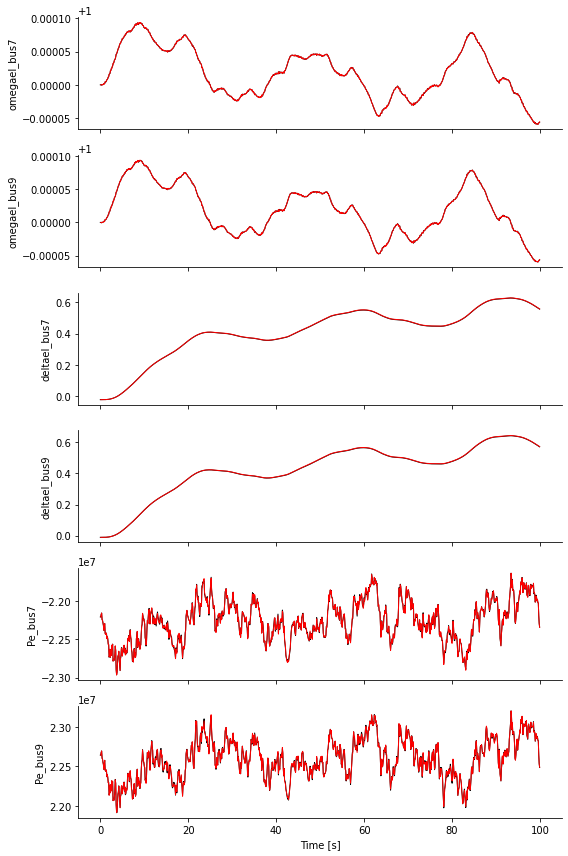

In [4]:
tend = 100
idx = {mode: t < tend for mode,t in time.items()}
cmap = {'trap': 'k', 'gear': 'r'}
N_vars = len(var_names)
fig,ax = plt.subplots(N_vars, 1, figsize=(8, 2*N_vars), sharex=True)
for i,var_name in enumerate(var_names):
    for mode in integration_modes:
        exec(f'var = {var_name}')
        ax[i].plot(time[mode][idx[mode]], var[mode][idx[mode]], cmap[mode], lw=1)
    for side in 'top','right':
        ax[i].spines[side].set_visible(False)
    ax[i].set_ylabel(var_name)
ax[-1].set_xlabel('Time [s]')
fig.tight_layout()